In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# FOR COLAB FILE UPLOAD
from google.colab import files
print("⬆️ Upload 2  files NOW:")
uploaded = files.upload()


⬆️ Upload 2  files NOW:


Saving credits.csv to credits.csv
Saving movies_metadata.csv to movies_metadata.csv


In [2]:
movies = pd.read_csv("movies_metadata.csv", low_memory=False)
credits = pd.read_csv("credits.csv")

movies.shape, credits.shape


((45466, 24), (45476, 3))

In [3]:
# Keep useful columns only
movies = movies[[
    "id", "budget", "revenue", "runtime",
    "vote_count", "vote_average", "genres", "overview", "title"
]]

movies = movies.dropna(subset=["budget","revenue","overview"])

# Convert numeric columns
movies["budget"] = pd.to_numeric(movies["budget"], errors="coerce")
movies["revenue"] = pd.to_numeric(movies["revenue"], errors="coerce")
movies["runtime"] = pd.to_numeric(movies["runtime"], errors="coerce")
movies["vote_count"] = pd.to_numeric(movies["vote_count"], errors="coerce")
movies["vote_average"] = pd.to_numeric(movies["vote_average"], errors="coerce")

movies = movies.dropna()
movies.head()


id    budget      revenue  runtime  vote_count  vote_average  \
0    862  30000000  373554033.0     81.0      5415.0           7.7   
1   8844  65000000  262797249.0    104.0      2413.0           6.9   
2  15602         0          0.0    101.0        92.0           6.5   
3  31357  16000000   81452156.0    127.0        34.0           6.1   
4  11862         0   76578911.0    106.0       173.0           5.7   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                         title  
0                    Toy Story  
1                      Jumanji  
2             Grumpier Old Men  
3            Waiting to Exhale  
4  Father of the Bride Part II

from matplotlib import pyplot as plt
_df_0['budget'].plot(kind='hist', bins=20, title='budget')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['runtime'].plot(kind='hist', bins=20, title='runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['vote_count'].plot(kind='hist', bins=20, title='vote_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('genres').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('overview').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='budget', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='revenue', y='runtime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='runtime', y='vote_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='vote_count', y='vote_average', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('genres')):
  _plot_series(series, series_name, i)
  fig.legend(title='genres', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('overview')):
  _plot_series(series, series_name, i)
  fig.legend(title='overview', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
_df_16['budget'].plot(kind='line', figsize=(8, 4), title='budget')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['runtime'].plot(kind='line', figsize=(8, 4), title='runtime')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['vote_count'].plot(kind='line', figsize=(8, 4), title='vote_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['genres'].value_counts()
    for x_label, grp in _df_20.groupby('id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('id')
_ = plt.ylabel('genres')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['overview'].value_counts()
    for x_label, grp in _df_21.groupby('genres')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('genres')
_ = plt.ylabel('overview')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_22.groupby('overview')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('overview')
_ = plt.ylabel('title')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='budget', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['genres'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='budget', y='genres', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['overview'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='budget', y='overview', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='budget', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
import ast

def extract_genre(x):
    try:
        data = ast.literal_eval(x)
        if isinstance(data, list) and len(data)>0:
            return data[0]["name"]
    except:
        return "Unknown"

movies["genre"] = movies["genres"].apply(extract_genre)
movies.head()


id    budget      revenue  runtime  vote_count  vote_average  \
0    862  30000000  373554033.0     81.0      5415.0           7.7   
1   8844  65000000  262797249.0    104.0      2413.0           6.9   
2  15602         0          0.0    101.0        92.0           6.5   
3  31357  16000000   81452156.0    127.0        34.0           6.1   
4  11862         0   76578911.0    106.0       173.0           5.7   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                         title      genre  
0                    Toy Story  Animation  
1                      Jumanji  Adventure  
2             Grumpier Old Men    Romance  
3            Waiting to Exhale     Comedy  
4  Father of the Bride Part II     Comedy

In [5]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

movies["sentiment"] = movies["overview"].apply(
    lambda x: sia.polarity_scores(x)["compound"]
)

movies.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


id    budget      revenue  runtime  vote_count  vote_average  \
0    862  30000000  373554033.0     81.0      5415.0           7.7   
1   8844  65000000  262797249.0    104.0      2413.0           6.9   
2  15602         0          0.0    101.0        92.0           6.5   
3  31357  16000000   81452156.0    127.0        34.0           6.1   
4  11862         0   76578911.0    106.0       173.0           5.7   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                         title      genre  sentiment  
0                    Toy Story  Animation     0.1280  
1                      Jumanji  Adventure    -0.4588  
2             Grumpier Old Men    Romance    -0.2238  
3            Waiting to Exhale     Comedy     0.8860  
4  Father of the Bride Part II     Comedy     0.5023

from matplotlib import pyplot as plt
_df_27['budget'].plot(kind='hist', bins=20, title='budget')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['runtime'].plot(kind='hist', bins=20, title='runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['vote_count'].plot(kind='hist', bins=20, title='vote_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_31.groupby('id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('genres').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('overview').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35.plot(kind='scatter', x='budget', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='revenue', y='runtime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='runtime', y='vote_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='vote_count', y='vote_average', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('id')):
  _plot_series(series, series_name, i)
  fig.legend(title='id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('genres')):
  _plot_series(series, series_name, i)
  fig.legend(title='genres', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('overview')):
  _plot_series(series, series_name, i)
  fig.legend(title='overview', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['runtime']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('runtime', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('runtime')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
_df_43['budget'].plot(kind='line', figsize=(8, 4), title='budget')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['runtime'].plot(kind='line', figsize=(8, 4), title='runtime')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['vote_count'].plot(kind='line', figsize=(8, 4), title='vote_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['genres'].value_counts()
    for x_label, grp in _df_47.groupby('id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('id')
_ = plt.ylabel('genres')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['overview'].value_counts()
    for x_label, grp in _df_48.groupby('genres')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('genres')
_ = plt.ylabel('overview')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_49.groupby('overview')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('overview')
_ = plt.ylabel('title')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['genre'].value_counts()
    for x_label, grp in _df_50.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('genre')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='budget', y='id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['genres'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='budget', y='genres', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['overview'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='budget', y='overview', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='budget', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

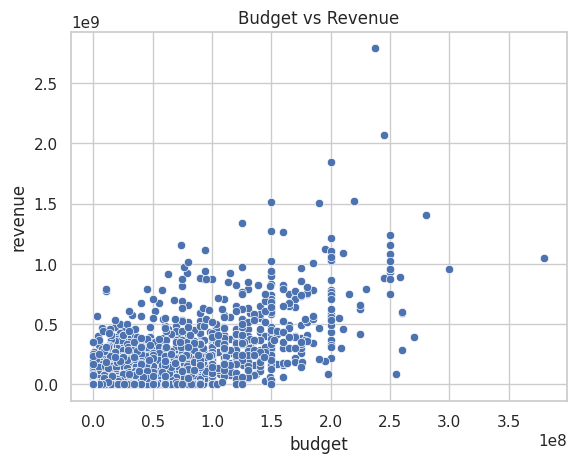

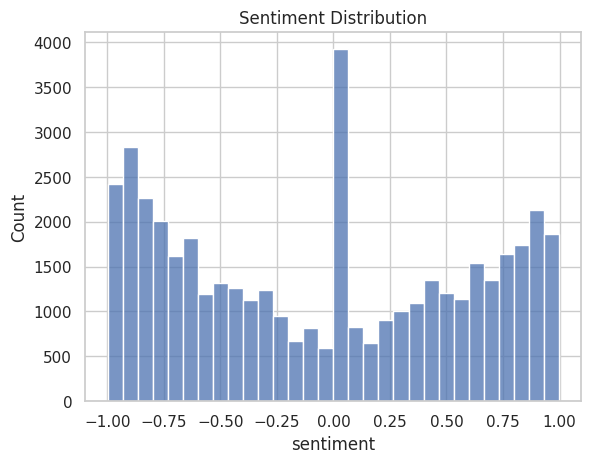

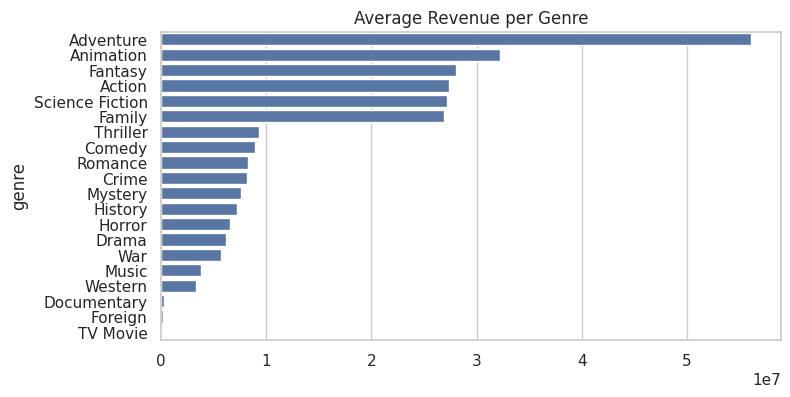

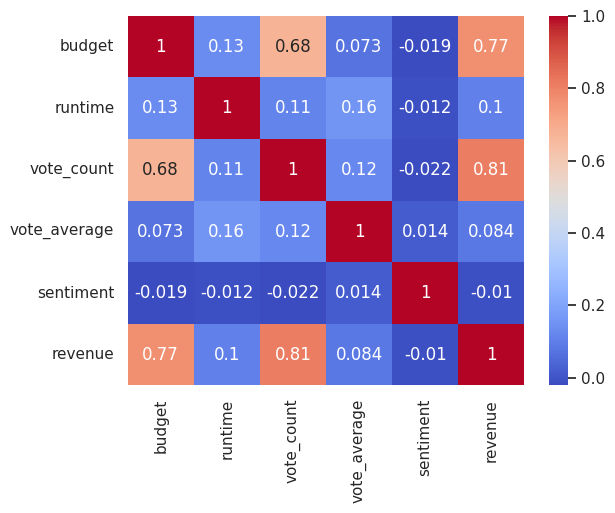

In [6]:
# Revenue vs Budget
sns.scatterplot(data=movies, x="budget", y="revenue")
plt.title("Budget vs Revenue")
plt.show()

# Sentiment distribution
sns.histplot(movies["sentiment"], bins=30)
plt.title("Sentiment Distribution")
plt.show()

# Genre-wise revenue
genre_rev = movies.groupby("genre")["revenue"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=genre_rev.values, y=genre_rev.index)
plt.title("Average Revenue per Genre")
plt.show()

# Correlation map
num_cols = ["budget","runtime","vote_count","vote_average","sentiment","revenue"]
sns.heatmap(movies[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()


In [7]:
# One-hot encoding of genre
genre_dummies = pd.get_dummies(movies["genre"], prefix="genre")

X = pd.concat([
    movies[["budget","runtime","vote_count","vote_average","sentiment"]],
    genre_dummies
], axis=1)

y = movies["revenue"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

movie_model = RandomForestRegressor(n_estimators=400, random_state=42)
movie_model.fit(X_train, y_train)

y_pred = movie_model.predict(X_test)


In [8]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 6626138.6949876435
RMSE: 30912989.153311253
R²: 0.7727799031855499


In [9]:
importance = pd.Series(movie_model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(15)


vote_count               0.666452
budget                   0.200318
runtime                  0.037957
sentiment                0.032837
vote_average             0.030472
genre_Animation          0.006944
genre_Adventure          0.004704
genre_Family             0.003720
genre_Action             0.003619
genre_Comedy             0.002816
genre_Drama              0.002034
genre_Thriller           0.001487
genre_Fantasy            0.001440
genre_Science Fiction    0.001249
genre_Mystery            0.001100
dtype: float64

In [14]:
# Suppose after preprocessing you have:
#   X_movie     -> final features for each movie (numeric + sentiment + dummies)
#   movie_model -> trained model (RandomForest or any regressor/classifier)

# 1. Take one random movie
sample_movie = X.sample(3, random_state=42)

print("Sample movie features:")
display(sample_movie)

# 2. Predict box office (or success score) for this movie
predicted_box_office = movie_model.predict(sample_movie)[0]

print("\nPredicted box office / success for this movie:", round(predicted_box_office, 2))


Sample movie features:


budget  runtime  vote_count  vote_average  sentiment  genre_Action  \
18072       0    100.0        45.0           7.4     0.3612         False   
5076        0     85.0        34.0           5.3    -0.7351         False   
40871       0     80.0         4.0           3.5     0.5994         False   

       genre_Adventure  genre_Animation  genre_Comedy  genre_Crime  \
18072            False            False         False        False   
5076             False            False         False        False   
40871            False            False         False        False   

       genre_Documentary  genre_Drama  genre_Family  genre_Fantasy  \
18072              False         True         False          False   
5076               False        False         False          False   
40871              False        False         False          False   

       genre_Foreign  genre_History  genre_Horror  genre_Music  genre_Mystery  \
18072          False          False         False        False          False   
5076           False          False          True        False          False   
40871          False          False          True        False          False   

       genre_Romance  genre_Science Fiction  genre_TV Movie  genre_Thriller  \
18072          False                  False           False           False   
5076           False                  False           False           False   
40871          False                  False           False           False   

       genre_War  genre_Western  
18072      False          False  
5076       False          False  
40871      False          False


Predicted box office / success for this movie: 122339.95
